In [17]:
import torch
import numpy as np

x=torch.randn(2,1,2);

x

tensor([[[ 0.4644,  0.4300]],

        [[-0.8711,  0.0369]]])

In [4]:
print("The first tensor:\n ",x)
print(x.shape)

y=x.squeeze(1)
print("The second tensor:\n ",y)
print(y.shape)


The first tensor:
  tensor([[[-1.2741,  0.3135]],

        [[-0.1921, -0.5512]]])
torch.Size([2, 1, 2])
The second tensor:
  tensor([[-1.2741,  0.3135],
        [-0.1921, -0.5512]])
torch.Size([2, 2])


In [9]:
x=torch.arange(25).reshape(5,5)
print(x)
print(x.max())
print(x.max(dim=0))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
tensor(24)
torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))


In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

In [21]:
%timeit z=(x@y)

8.8 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
x=np.random.random((1,6400))
y=np.random.random((6400,5000))

In [23]:
%timeit np.matmul(x,y)

8.92 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]

In [26]:
X=torch.tensor(x).float()
Y=torch.tensor(y).float()

In [28]:
import torch.nn as nn

In [29]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)

    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x


In [30]:
mynet=MyNeuralNet()

In [34]:
for par in mynet.parameters():
    print (par)

Parameter containing:
tensor([[ 0.1798, -0.6635],
        [-0.5569,  0.6514],
        [ 0.4623, -0.2976],
        [-0.0086,  0.6133],
        [ 0.1001, -0.6259],
        [-0.0365,  0.5006],
        [-0.1263, -0.3685],
        [-0.2148,  0.6015]], requires_grad=True)
Parameter containing:
tensor([-0.6688,  0.4570,  0.5542,  0.4597, -0.2691, -0.5183,  0.4941,  0.6456],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0184, -0.3271,  0.0983, -0.1230, -0.2125,  0.3056, -0.0216,  0.0336]],
       requires_grad=True)
Parameter containing:
tensor([-0.3505], requires_grad=True)


In [35]:
loss_func=nn.MSELoss()

In [37]:
_Y=mynet(X)
loss_value=loss_func(_Y,Y)

In [39]:
loss_value

tensor(109.3427, grad_fn=<MseLossBackward0>)

In [43]:
from torch.optim import SGD
opt=SGD(mynet.parameters(),lr=0.001)

In [57]:
loss_history = []
for _ in range(1000):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().numpy())

Text(0, 0.5, 'loss value')

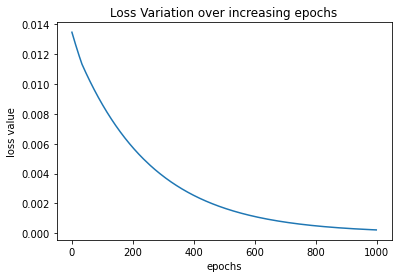

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss Variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')